In [173]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

In [174]:
rta_df = pd.read_csv('RTA Dataset.csv')

In [175]:
rta_df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


# Dataset preprocessing and cleaning

#### Cleaning Age_band_of_driver field

In [176]:
# Removing duplicates
rta_df = rta_df.drop_duplicates()

In [177]:
rta_df.Age_band_of_driver.unique()

array(['18-30', '31-50', 'Under 18', 'Over 51', 'Unknown'], dtype=object)

In [178]:
# Replacing string values from Age_band_of_driver
def replace_string(value):
    if isinstance(value, str) and '-' not in value:
        return np.nan
    return value

In [179]:
rta_df['Age_band_of_driver'] = rta_df['Age_band_of_driver'].apply(replace_string)

In [180]:
rta_df.Age_band_of_driver.unique()

array(['18-30', '31-50', nan], dtype=object)

#### Removing rows where sex of driver is unknown

In [181]:
rta_df.Sex_of_driver.unique()

array(['Male', 'Female', 'Unknown'], dtype=object)

In [182]:
rta_df = rta_df[(rta_df['Sex_of_driver'] == 'Male') | (rta_df['Sex_of_driver'] == 'Female')]

#### Removing extra data from Type_of_vehicle 

In [183]:
rta_df.Type_of_vehicle.unique()

array(['Automobile', 'Public (> 45 seats)', 'Lorry (41?100Q)', nan,
       'Public (13?45 seats)', 'Lorry (11?40Q)', 'Long lorry',
       'Public (12 seats)', 'Taxi', 'Pick up upto 10Q', 'Stationwagen',
       'Ridden horse', 'Other', 'Bajaj', 'Turbo', 'Motorcycle',
       'Special vehicle', 'Bicycle'], dtype=object)

In [184]:
rta_df['Type_of_vehicle'] =rta_df['Type_of_vehicle'].str.replace(r'\(.*', '', regex=True)

In [185]:
rta_df.Type_of_vehicle.unique()

array(['Automobile', 'Public ', 'Lorry ', nan, 'Long lorry', 'Taxi',
       'Pick up upto 10Q', 'Stationwagen', 'Ridden horse', 'Other',
       'Bajaj', 'Turbo', 'Motorcycle', 'Special vehicle', 'Bicycle'],
      dtype=object)

#### Converting Type_of_vehicle to string

In [186]:
rta_df['Type_of_vehicle'] = rta_df['Type_of_vehicle'].astype(str)

#### Removing the extra information from Pedestrial Movement

In [188]:
rta_df.Pedestrian_movement.unique()

array(['Not a Pedestrian', "Crossing from driver's nearside",
       'Unknown or other',
       'Crossing from nearside - masked by parked or statioNot a Pedestrianry vehicle',
       'Crossing from offside - masked by  parked or statioNot a Pedestrianry vehicle',
       'In carriageway, statioNot a Pedestrianry - not crossing  (standing or playing)',
       'Walking along in carriageway, back to traffic',
       'Walking along in carriageway, facing traffic',
       'In carriageway, statioNot a Pedestrianry - not crossing  (standing or playing) - masked by parked or statioNot a Pedestrianry vehicle'],
      dtype=object)

In [189]:
rta_df['Pedestrian_movement'] =rta_df['Pedestrian_movement'].str.replace(r'\-.*', '',regex=True)

In [190]:
rta_df.Pedestrian_movement.unique()

array(['Not a Pedestrian', "Crossing from driver's nearside",
       'Unknown or other', 'Crossing from nearside ',
       'Crossing from offside ',
       'In carriageway, statioNot a Pedestrianry ',
       'Walking along in carriageway, back to traffic',
       'Walking along in carriageway, facing traffic'], dtype=object)

#### Cleaning Time (removing minutes and seconds)

In [263]:
rta_df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry,Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public,Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,nan,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry,Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,NaN,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,NaN,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry,Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [265]:
rta_df.Time

0        17:02:00
1        17:02:00
2        17:02:00
3         1:06:00
4         1:06:00
           ...   
12311    16:15:00
12312    18:00:00
12313    13:55:00
12314    13:55:00
12315    13:55:00
Name: Time, Length: 12138, dtype: object

In [266]:
rta_df['Time'] =rta_df['Time'].str.replace(r'\:.*', '',regex=True)

In [270]:
rta_df.Time.unique()

array(['17', '1', '14', '22', '8', '15', '12', '18', '13', '20', '16',
       '21', '9', '10', '19', '11', '23', '7', '0', '5', '6', '4', '3',
       '2'], dtype=object)

The dataset is finally cleaned

# EDA & Visualization

## Gender analysis

In [158]:
sns.set_style('darkgrid')

In [159]:
rta_df.Sex_of_driver.unique()

array(['Male', 'Female'], dtype=object)

In [160]:
gender_df = rta_df.Sex_of_driver.value_counts()

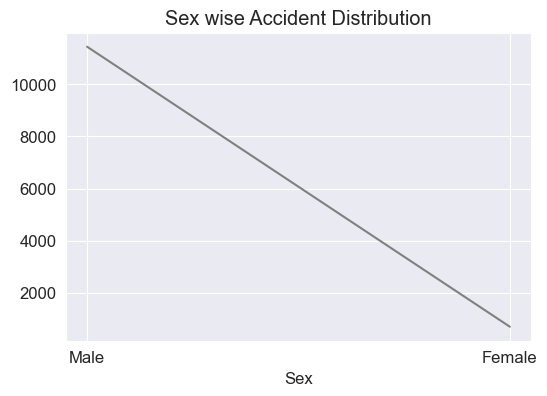

In [161]:
matplotlib.rcParams['font.size'] = 12
plt.figure(figsize = (6, 4))
plt.plot(gender_df.index, gender_df, color = 'gray');
plt.xlabel('Sex');
plt.title('Sex wise Accident Distribution');

The drastic deviation in graph refers to the fact that men are highly involved in accidents than women

## Relation of Driving Experience with accidents

In [162]:
driving_experience = rta_df.Driving_experience.value_counts()

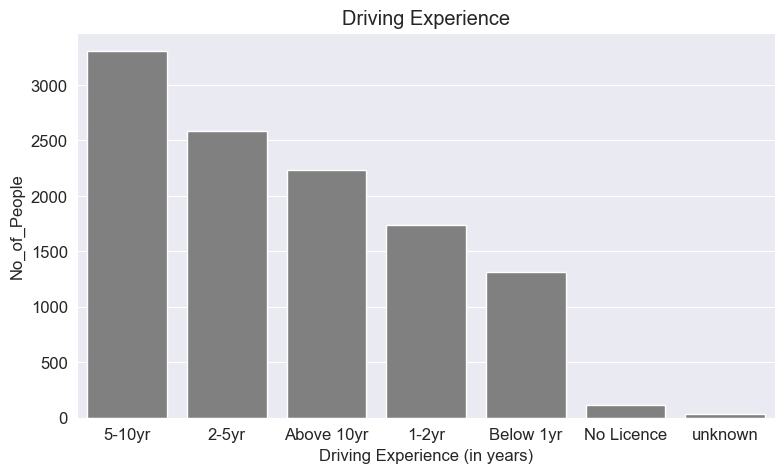

In [303]:
matplotlib.rcParams['font.size'] = 12
plt.figure(figsize = (9, 5))
sns.barplot(x = driving_experience.index, y = driving_experience, color = 'gray');
plt.xlabel('Driving Experience (in years)');
plt.ylabel('No_of_People');
plt.title('Driving Experience');

This barplot draws a weird conclusion that people with more driving experience are highly involved in road accidents as compared to people with less driving experience

## Age wise collision

In [164]:
age_wise_df = rta_df.Age_band_of_driver.value_counts()

In [165]:
age_wise_df

Age_band_of_driver
18-30    4205
31-50    4021
Name: count, dtype: int64

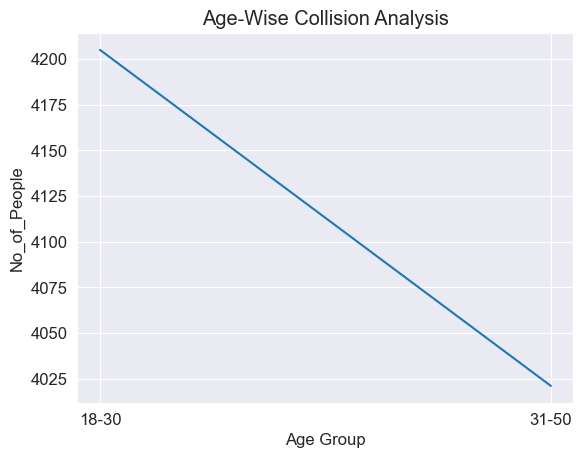

In [302]:
matplotlib.rcParams['font.size'] = 12;
plt.title('Age-Wise Collision Analysis')
plt.plot(age_wise_df.index, age_wise_df);
plt.xlabel('Age Group');
plt.ylabel('No_of_People');

By the above line chart we can conclude that people from 18-30 i.e young generations are highly involved in accidents

## Vehicles with high severities

In [167]:
type_of_vehicle = rta_df.Type_of_vehicle.value_counts()

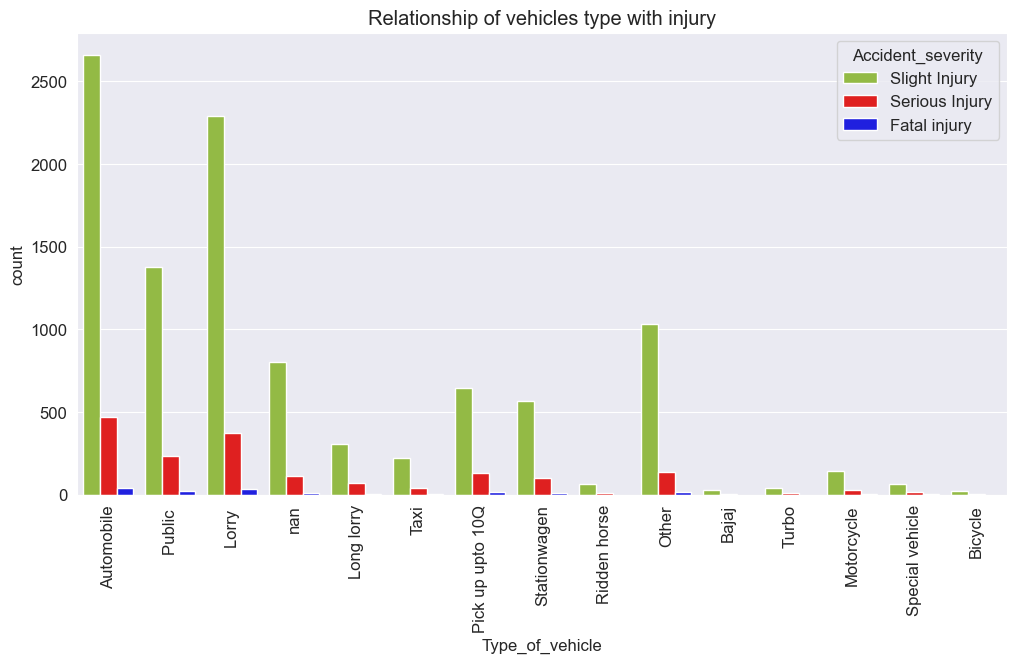

In [301]:
plt.figure(figsize = (12, 6))
matplotlib.rcParams['font.size'] = 12;
plt.title('Relationship of vehicles type with injury')
custom_palette = {"Slight Injury": "yellowgreen", "Serious Injury": "red", "Fatal injury": "blue"}
sns.countplot(x='Type_of_vehicle', hue = 'Accident_severity', data = rta_df, palette = custom_palette);
plt.xticks(rotation=90,);

By this chart we can conclude that 'Automobile' is largely involved in accidents while 'Turbo' has least involvement in accidents

## Pedestrians involved in accidents

In [193]:
pedestrian_movement = rta_df.Pedestrian_movement.value_counts()

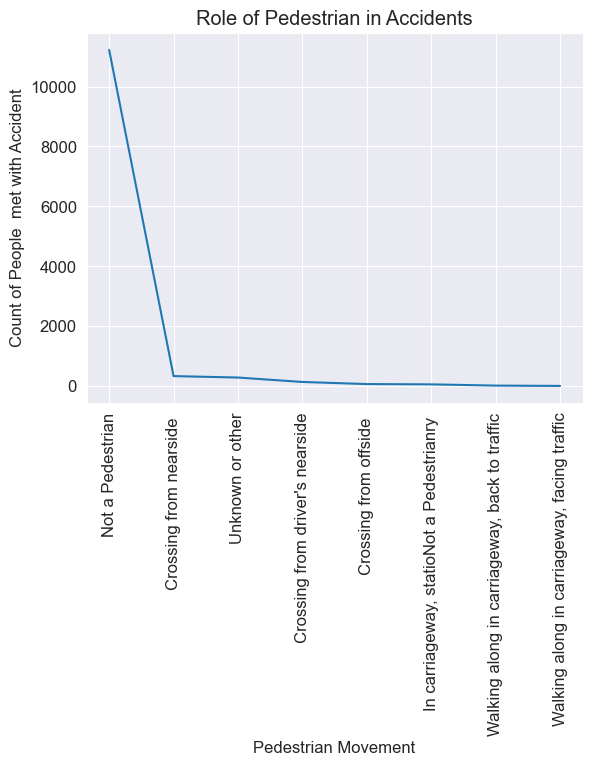

In [304]:
plt.title('Role of Pedestrian in Accidents')
plt.plot(pedestrian_movement.index, pedestrian_movement);
plt.xticks(rotation = 90);
plt.xlabel('Pedestrian Movement');
plt.ylabel('Count of People  met with Accident');

From this we can conclude that Pedestrian's dont highly tend to get involved in accidents.

## Days on which most accidents happen

In [235]:
week_day = rta_df.Day_of_week.value_counts()

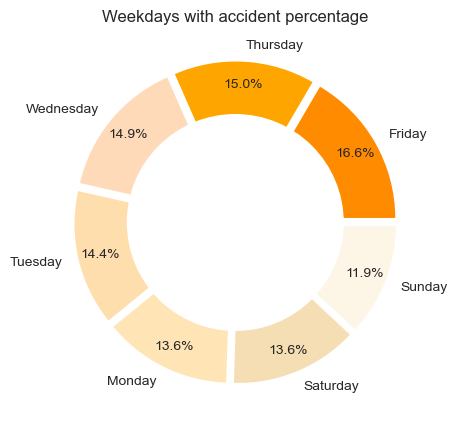

In [248]:
plt.figure(figsize = (5,5))
plt.title('Weekdays with accident percentage')
explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05);
color = ['darkorange', 'orange', 'peachpuff', 
          'navajowhite', 'moccasin', 'wheat', 'oldlace']
plt.pie(week_day, colors = color, labels=week_day.index,
        autopct='%1.1f%%', pctdistance=0.85,
        explode=explode);
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf();
fig.gca().add_artist(centre_circle);

From this donut chart we can conclude that most accidents happen on Friday followed by Thursday. While the least happens on Sunday and Saturday

## Time  at which most accidents tend to happen

In [287]:
rta_df['Time'] = pd.to_numeric(rta_df['Time'], errors='coerce');

In [288]:
sorted_time = rta_df.sort_values(by='Time')

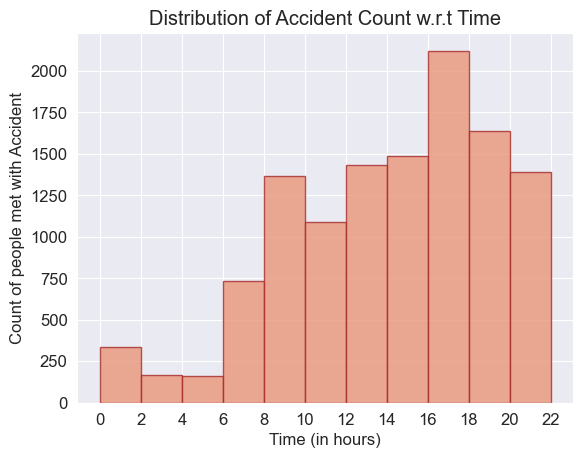

In [305]:
bins = range(0, 24, 2)
matplotlib.rcParams['font.size'] = 12;
plt.title('Distribution of Accident Count w.r.t Time')
plt.hist(sorted_time['Time'], bins=bins, edgecolor='brown', color = 'darksalmon', alpha=0.8);
plt.xticks(bins);
plt.xlabel('Time (in hours)');
plt.ylabel('Count of people met with Accident');

From this Time histogram, we can conclude that most no. of accidents happen between 4.00 pm to 6.00 pm

## Cause of Accident

In [253]:
cause_of_accident = rta_df.Cause_of_accident.value_counts().head(10)

In [306]:
cause_of_accident

Cause_of_accident
No distancing                           2237
Changing lane to the right              1776
Changing lane to the left               1450
Driving carelessly                      1380
No priority to vehicle                  1192
Moving Backward                         1117
No priority to pedestrian                713
Other                                    448
Overtaking                               424
Driving under the influence of drugs     335
Name: count, dtype: int64

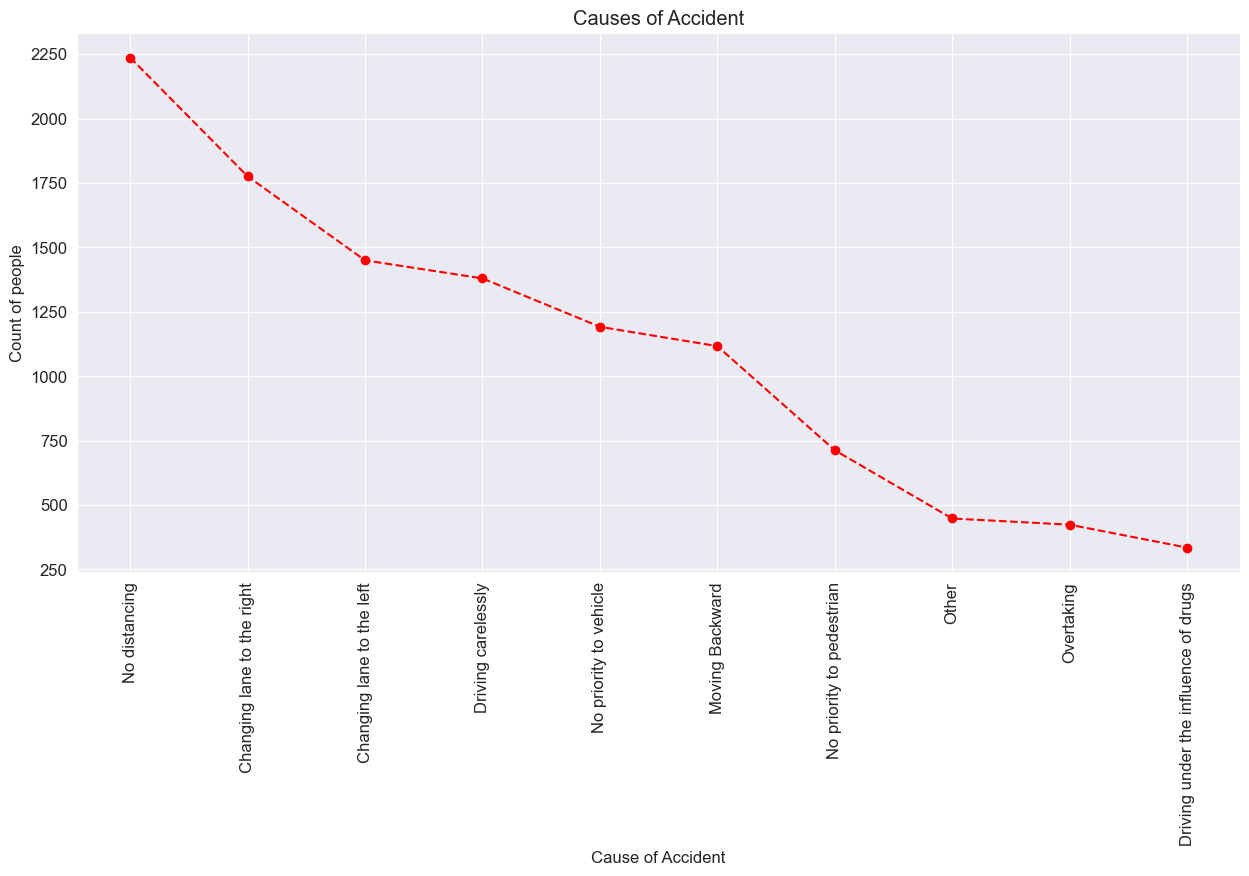

In [319]:
plt.figure(figsize=(15, 7));
plt.plot(cause_of_accident.index,cause_of_accident, 'o--r');
plt.xticks(rotation = 90);
plt.title('Causes of Accident');
plt.xlabel('Cause of Accident');
plt.ylabel('Count of people');

Conclusion : From this graph we can conclude that People that doesn't maintain distance from another vehicle highly tend to involve in accidents